In [1]:
#importing libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import sklearn
from pandas import Series, DataFrame
from pylab import rcParams
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn.metrics import classification_report
import pydotplus

In [2]:
#import the titanic data using a url
url = "https://raw.githubusercontent.com/BigDataGal/Python-for-Data-Science/master/titanic-train.csv"
titanic = pd.read_csv(url)

In [3]:
#getting some amount of data
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
titanic['Fare']

0       7.2500
1      71.2833
2       7.9250
3      53.1000
4       8.0500
        ...   
886    13.0000
887    30.0000
888    23.4500
889    30.0000
890     7.7500
Name: Fare, Length: 891, dtype: float64

In [4]:
#getting information about data
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
#droping unnecessary columns
titanic_new = titanic.drop(['PassengerId', 'Name', 'Ticket', 'Cabin', 'Embarked'], axis = 1)

In [6]:
titanic_new.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,male,22.0,1,0,7.2500
1,1,1,female,38.0,1,0,71.2833
2,1,3,female,26.0,0,0,7.9250
3,1,1,female,35.0,1,0,53.1000
4,0,3,male,35.0,0,0,8.0500


# Data Cleaning

In [7]:
#finding null values 
titanic_new.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
dtype: int64

In [8]:
#As "Sex" column has string type data like "male" and "female" so we have to convert into a numerical data
#here  we'll sklearn library preprocessing "LabelEncoder"
from sklearn.preprocessing import LabelEncoder
number = LabelEncoder()
titanic_new['Sex'] = number.fit_transform(titanic_new['Sex'].astype(str))

In [9]:
titanic_new['Sex']

0      1
1      0
2      0
3      0
4      1
      ..
886    1
887    0
888    0
889    1
890    1
Name: Sex, Length: 891, dtype: int32

In [10]:
#Also we have column called "Age" which has numeric bins value which will cause the error bcoz it is not able to comapre with other values
def imputate_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    if pd.isnull(Age)==1:
        if Pclass==1:
            return 37
        elif Pclass==2:
            return 29
        else:
            return 24
    else:
        return Age

In [11]:
titanic_new["Age"] = titanic_new[['Age','Pclass']].apply(imputate_age,axis=1)

In [12]:
titanic_new["Age"].head()

0    22.0
1    38.0
2    26.0
3    35.0
4    35.0
Name: Age, dtype: float64

In [13]:
titanic_new.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
dtype: int64

# Data Visulaization

In [14]:
#Divide the data into numerical and categorical 
titanic_newNum = titanic_new[['Age', 'SibSp','Fare']]
titanic_newCat = titanic_new[['Survived', 'Pclass', 'Sex', 'Parch']]

univariate Analysis

C:\Anaconda3\envs\mlproj\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Anaconda3\envs\mlproj\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Anaconda3\envs\mlproj\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Anaconda3\envs\mlproj\lib\si

<AxesSubplot:xlabel='Age', ylabel='Density'>

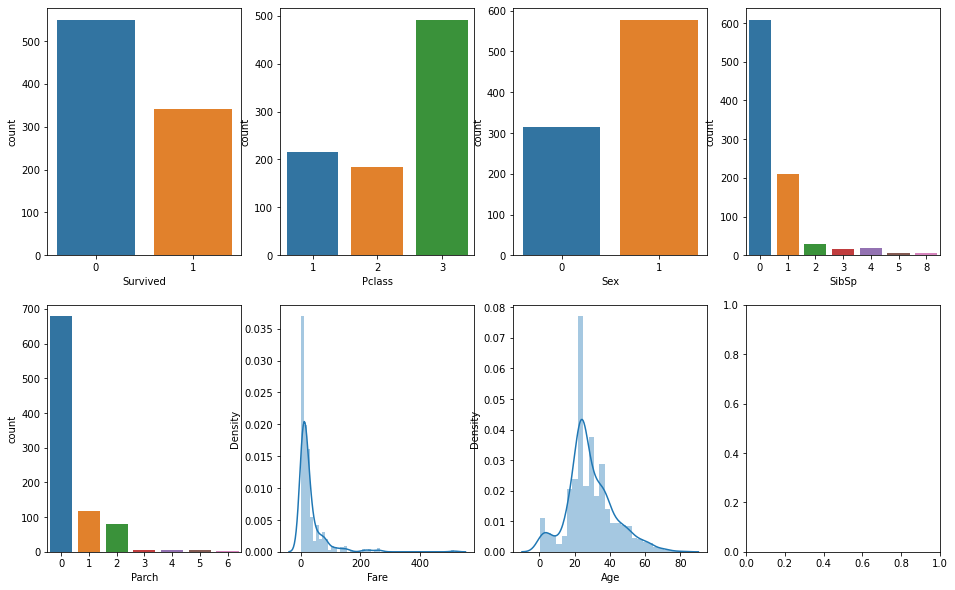

In [15]:
fig, axes = plt.subplots(2, 4, figsize=(16, 10))
sb.countplot('Survived',data=titanic_new,ax=axes[0,0])
sb.countplot('Pclass',data=titanic_new,ax=axes[0,1])
sb.countplot('Sex',data=titanic_new,ax=axes[0,2])
sb.countplot('SibSp',data=titanic_new,ax=axes[0,3])
sb.countplot('Parch',data=titanic_new,ax=axes[1,0])
sb.distplot(titanic_new['Fare'], kde=True,ax=axes[1,1])
sb.distplot(titanic_new['Age'].dropna(),kde=True,ax=axes[1,2])

Bivariate Analysis

<AxesSubplot:ylabel='SibSp'>

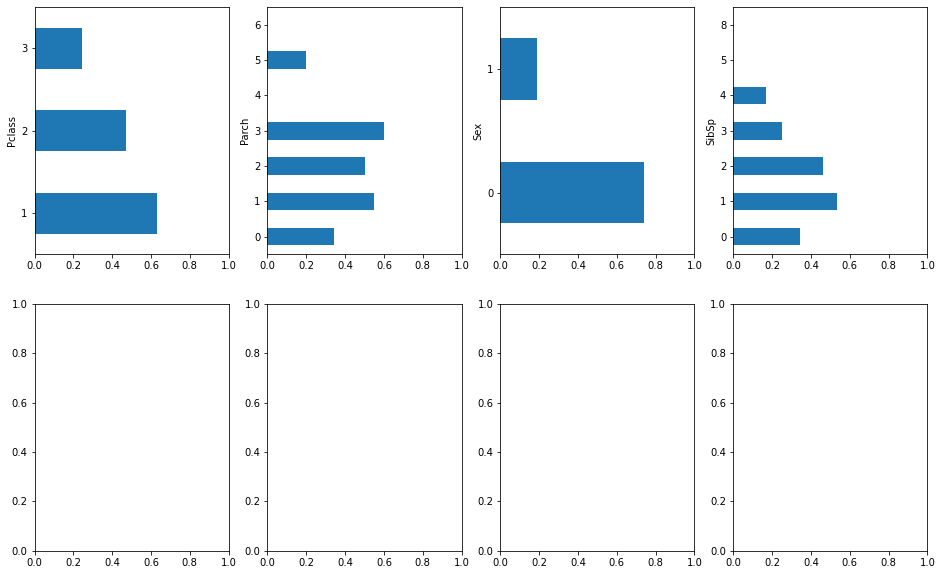

In [16]:
figbi, axesbi = plt.subplots(2, 4, figsize=(16, 10))
titanic_new.groupby('Pclass')['Survived'].mean().plot(kind='barh',ax=axesbi[0,0],xlim=[0,1])
titanic_new.groupby('Parch')['Survived'].mean().plot(kind='barh',ax=axesbi[0,1],xlim=[0,1])
titanic_new.groupby('Sex')['Survived'].mean().plot(kind='barh',ax=axesbi[0,2],xlim=[0,1])
titanic_new.groupby('SibSp')['Survived'].mean().plot(kind='barh',ax=axesbi[0,3],xlim=[0,1])


<ipython-input-17-15aa7d3493d5>:4: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask=np.zeros_like(corr, dtype=np.bool),


<AxesSubplot:>

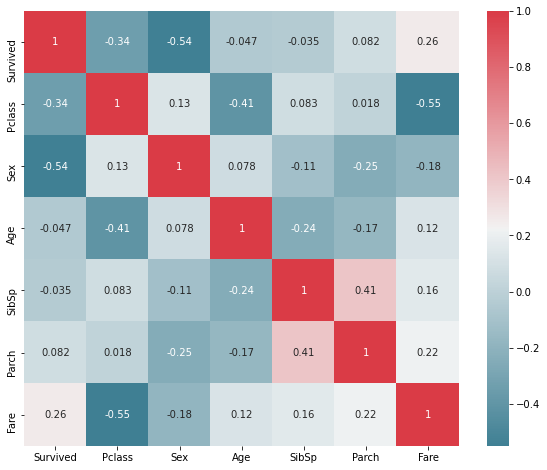

In [17]:
f, ax = plt.subplots(figsize=(10, 8))
corr = titanic_new.corr()
sb.heatmap(corr,
            mask=np.zeros_like(corr, dtype=np.bool), 
            cmap=sb.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax, annot= True)

In [18]:
titanic_new.to_csv('titanic.csv')

# Model Building

In [19]:
# X independent variable and y dependent variable
X  = titanic_new.drop(columns = 'Survived')
y = titanic_new['Survived']

In [20]:
#Split dataset into tarining and testing
X_train, X_test, y_train, y_test = train_test_split(X , y, test_size = 0.30, random_state = 101)

In [21]:
#visualize the data on tree
classifier = DecisionTreeClassifier()
classifier.fit(X_train, y_train)

DecisionTreeClassifier()

In [22]:
feature_name = list(X.columns)
class_name = list(y_train.unique())
feature_name


['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']

In [23]:
class_name

[1, 0]

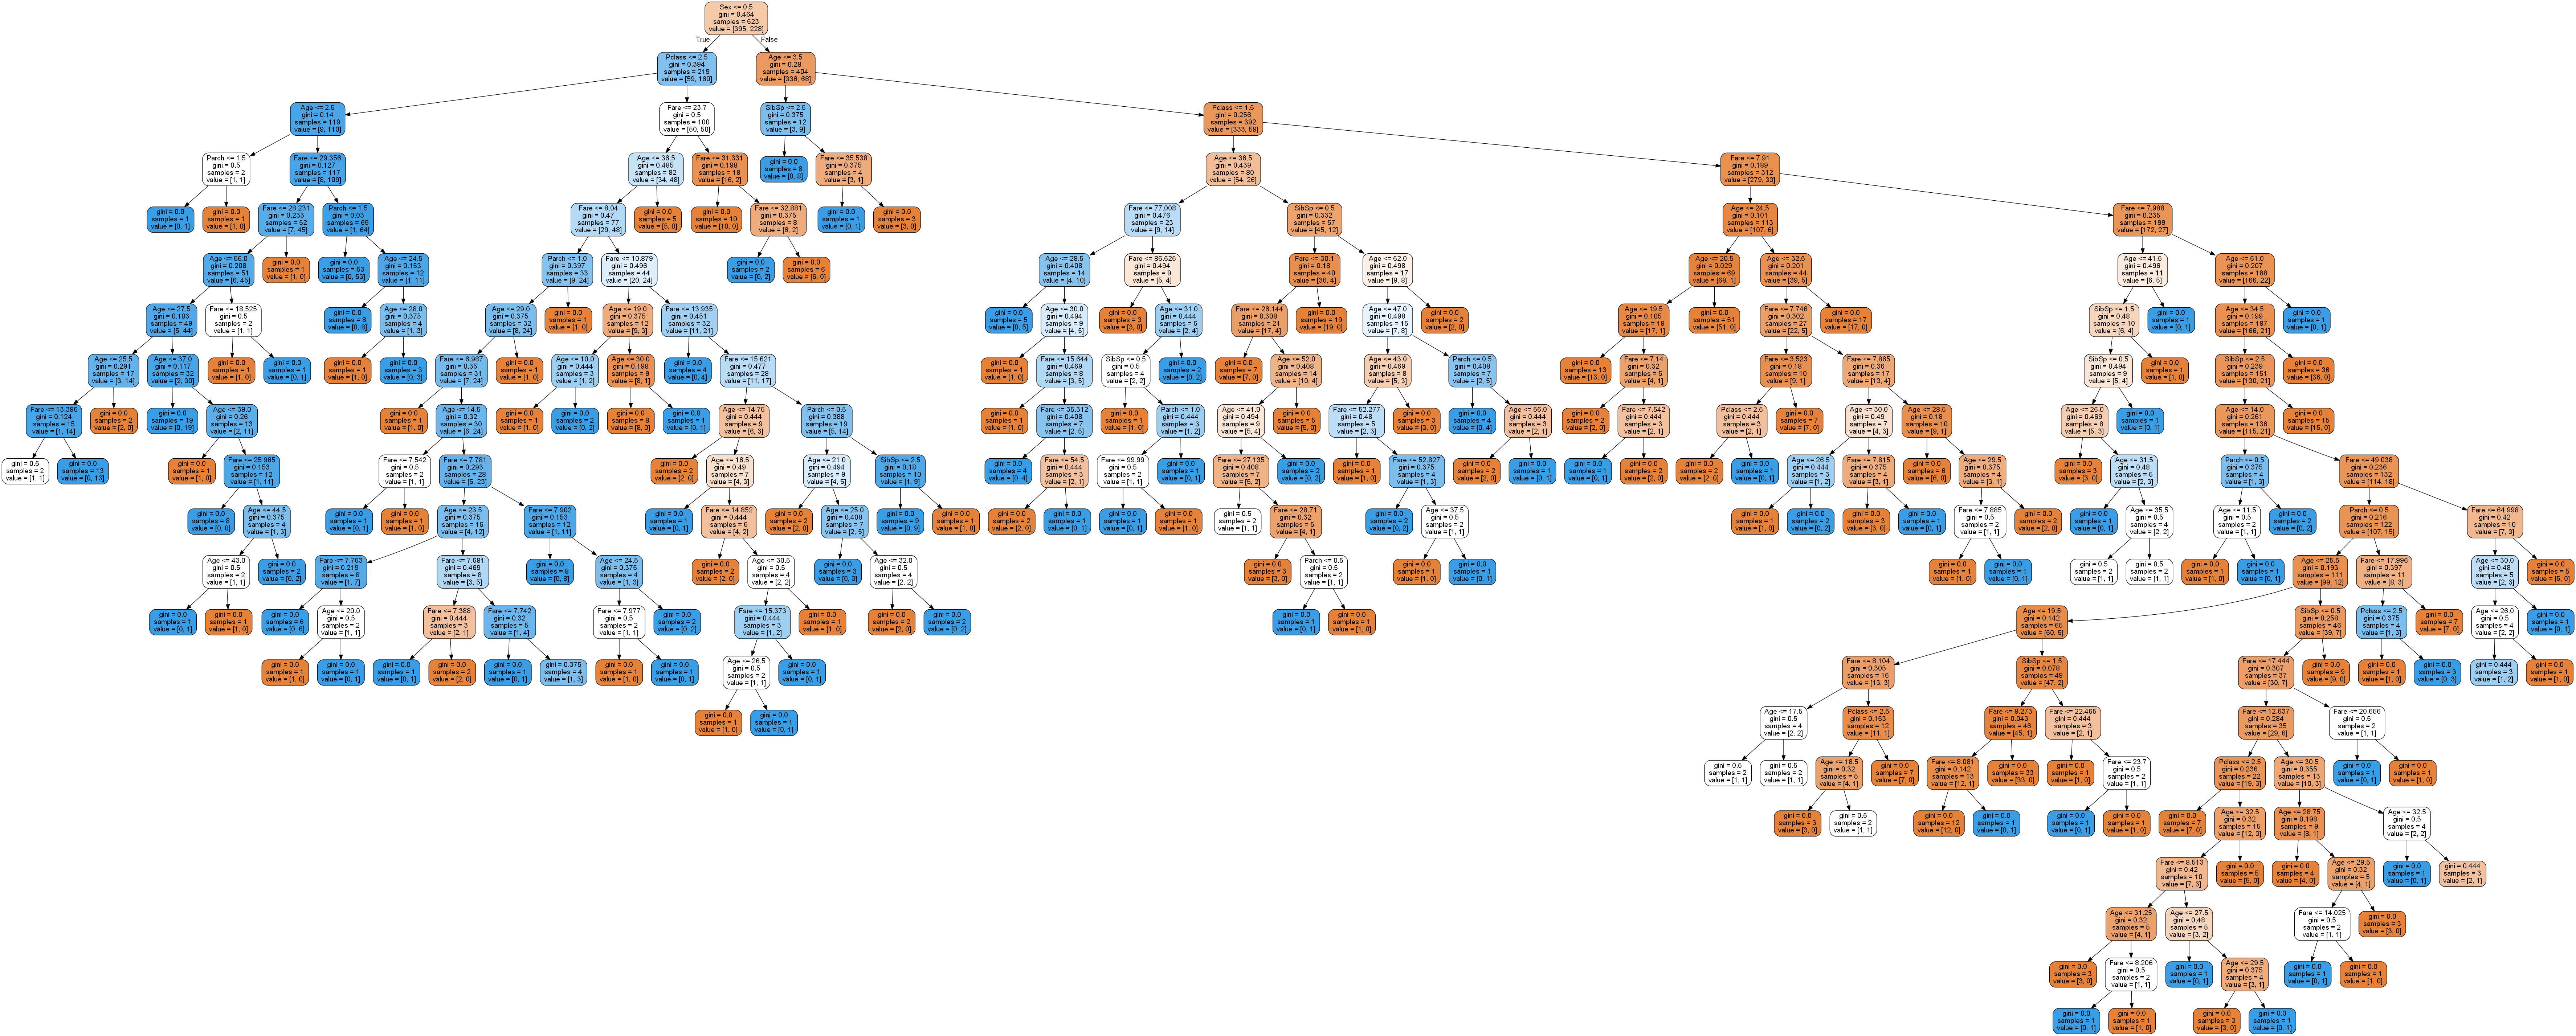

In [24]:
from sklearn.tree import export_graphviz
import pydotplus
import graphviz
from IPython.display import Image 
#Create a dot file which stores the tree structure
dot_file = export_graphviz(classifier, feature_names = feature_name, rounded = True, filled = True)

#Draw the graph
graph = pydotplus.graph_from_dot_data(dot_file)
graph.write_png("MyTree.png")

#show the graph
Image(graph.create_png())

In [25]:
classifier.score(X_train, y_train)

0.9839486356340289

In [26]:
pred = classifier.predict(X_test)
pred

array([1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 1], dtype=int64)

In [27]:
#accuracy of our classification tree
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
Acuuracy = accuracy_score( y_test, pred)
Acuuracy

0.7985074626865671

In [28]:
con_matrix = confusion_matrix(y_test,pred)
con_matrix

array([[132,  22],
       [ 32,  82]], dtype=int64)

In [29]:
print(f"Cf_report : {classification_report(y_test,pred)}")

Cf_report :               precision    recall  f1-score   support

           0       0.80      0.86      0.83       154
           1       0.79      0.72      0.75       114

    accuracy                           0.80       268
   macro avg       0.80      0.79      0.79       268
weighted avg       0.80      0.80      0.80       268



In [31]:
#predicting the data
my_survival = [[1,0,38,1, 0, 71.2833]]
pred = classifier.predict(my_survival)
print(pred)

[1]


In [32]:
!pip install pickle-mixin

  Created wheel for pickle-mixin: filename=pickle_mixin-1.0.2-py3-none-any.whl size=5998 sha256=0263b5e312c014b4d9185524c138742767245538c4d29638e6d42e82818c7365
  Stored in directory: c:\users\power\appdata\local\pip\cache\wheels\2a\a4\6c\83bfbc3b94f1bb43d634b07a6a893fd437a45c58b29aea5142
Successfully built pickle-mixin


In [33]:
import pickle
pickle.dump(classifier, open('titanicdatasetDecisionTree.pkl', 'wb'))